In [218]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import re
import shutil
pd.options.display.max_colwidth = None

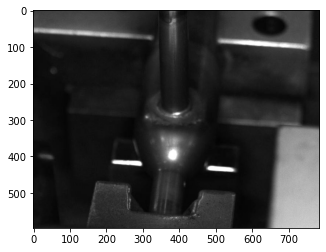

In [220]:
img = cv2.imread('../sd_image_data/221201/CAM1/221201_155305_0000000002_CAM1_NORMAL_OK.jpg')
plt.imshow(img)
plt.show()

In [221]:
cam1_list = glob.glob('../sd_image_data/**/CAM1/*.jpg')
cam1_list = [x for x in cam1_list if re.search('CAM1_SHAPE1_OK' , x)] # shape_list 추출
# shape list 제거
for shape in cam1_list:
    os.remove(shape)
cam2_list = glob.glob('../sd_image_data/**/CAM2/*')
for shape in cam2_list:
    os.remove(shape)

In [216]:
cam2_folder_list = glob.glob('../sd_image_data/**/CAM2')

In [217]:
cam2_folder_list

[]

In [26]:
for folder in cam2_folder_list:
    os.rmdir(folder)

In [29]:
folder_list = glob.glob('../sd_image_data/*')
for folder in folder_list:
    os.makedirs( folder + '/label', exist_ok= True)

In [30]:
folder_list = os.listdir('../sd_image_data')
img_list = glob.glob('../sd_image_data/**/**/*.jpg')
cam1_list = glob.glob('../sd_image_data/**/CAM1/*.jpg')
cam2_list = glob.glob('../sd_image_data/**/CAM2/*.jpg')

print('folder_list :' ,len(folder_list))
print('date per img len :' , len(img_list) // 21)
print('img_list :' , len(img_list))
print('cam1_list :' , len(cam1_list))
print('cam2_list :' , len(cam2_list))

folder_list : 21
date per img len : 1727
img_list : 36284
cam1_list : 36284
cam2_list : 0


In [183]:
from scipy.stats import ttest_ind
import tqdm
from ipywidgets import interact

def img_ttest(d_type , stand_d_path): 
    
    # show standard img
    stand_data = cv2.imread(stand_d_path, 0  )
    stand_data = stand_data[:550 , 220:550]
    plt.imshow(stand_data )
    plt.title('stand_img')
    plt.show()


    # standard img vs all img ttest
    data_img_path = glob.glob(f'../sd_image_data/**/{d_type}/*.jpg')
    data_list = []
    
    for img_path_i in tqdm.tqdm(data_img_path):
        data = cv2.imread(img_path_i , 0)
        data = data[:550 , 220:550]
        statistic, p_value = ttest_ind(
                                        a=stand_data.flatten(),
                                        b=data.flatten(),
                                        equal_var=True # variance equal.
                                       )
        data_list.append([img_path_i , statistic])

    # data to 
    df = pd.DataFrame(data_list , columns = ['img_path' , 'corr'])
    df['corr'] = df['corr'].apply(lambda x : abs(x))

    df = df.sort_values('corr')
    df = df.reset_index().drop('index' , axis = 1)
    return df

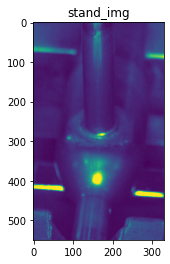

100%|██████████| 31193/31193 [00:59<00:00, 521.57it/s]


In [222]:
d_type = 'CAM1'
stand_d_path = '../sd_image_data/221201/CAM1/221201_155305_0000000002_CAM1_NORMAL_OK.jpg'
df = img_ttest(d_type , stand_d_path)

In [224]:
df = df[::-1].reset_index()
df = df.drop('index' , axis = 1)

In [225]:
from ipywidgets import interact
@interact(index=(0, len(df)-1))
def show_sample(index =0):
    df_i = df.iloc[index]
    img = cv2.imread(df_i['img_path'] , 0)
    plt.imshow(img)
    plt.title(f"idx : {index}\nF : {df_i['corr']}\n{df_i['img_path']}")
#     print(df_i['img_path'])

interactive(children=(IntSlider(value=0, description='index', max=31192), Output()), _dom_classes=('widget-int…

In [205]:
# df_remove = df[ (df.index == 0) | (df.index == 1) ]

In [206]:
len(df_remove)

2

In [209]:
df[df.index ==14472]

,img_path,corr
14472,../sd_image_data/230102/CAM1/230102_133908_0000031119_CAM1_NORMAL_OK.jpg,12.196333


In [208]:
# #remove img
# for idx , row in df_remove.iterrows():
#     os.remove(row['img_path'])

In [223]:
print(f"remove data : {36284 - 31193}")

remove data : 5091
